In [1]:
import umap 
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sbn
import torch 
import torch_geometric as pyg 
import sklearn 


import sys 
sys.path.append('../../')
import src.models.utils as utils
from src.data.LincsDataset import LincsDataset

from src.interpret.extract_entity_function import extract_entity_function
from src.interpret.GSNNExplainer import GSNNExplainer 
from src.interpret.plot_explanation_graph import plot_explanation_graph, plot_hairball

from src.prioritize.utils import get_base_X, dose2scale, set_drug_concs
from src.uncertainty.utils import root_mean_squared_picp_error, compute_picp, compute_ECE

from src.prioritize.utils import * 

from src.proc.load_mut import * 

%load_ext autoreload
%autoreload 2

/home/teddy/miniconda3/envs/grcp/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


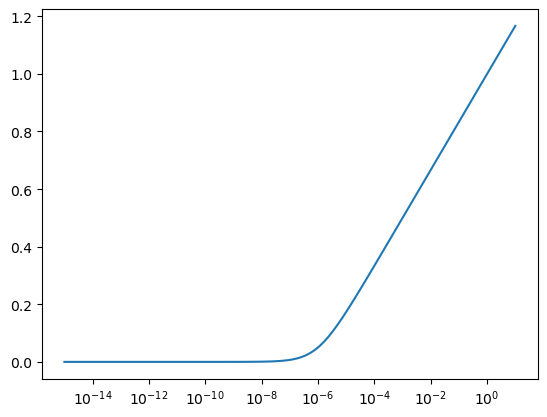

In [10]:
plt.figure() 
x = np.logspace(-15,1, 100)
y = -(np.log10(x + 1e-6) - np.log10(1e-6))/np.log10(1e-6)
plt.plot(x,y)
plt.xscale('log')
plt.show()

In [2]:
mut = load_mut(path='../../../data/', extpath='../../extdata/', include_variants=['damaging'])

In [4]:
mut[['P04637']].head() # TP53 

uniprot,P04637
cell_iname,
22RV1,1.0
5637,0.0
A204,0.0
A375,0.0
A549,0.0


In [5]:
mut[['P04637']].sum()

uniprot
P04637    31.0
dtype: float64

In [9]:
mut[['P01116']].sum()

uniprot
P01116    2.0
dtype: float64